# Explore here

In this dataset, you will find the following variables:

age. Age of primary beneficiary (numeric)

sex. Gender of the primary beneficiary (categorical)

bmi. Body mass index (numeric)

children. Number of children/dependents covered by health insurance (numeric)

smoker. Is the person a smoker? (categorical)

region. Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)

charges. Health insurance premium (numerical)

Step 1: Load the dataset.

Step 2: Perform a full EDA
This second step is vital to ensure that we keep the variables that are strictly necessary and eliminate those that are not relevant or do not provide information. Use the example Notebook we worked on and adapt it to this use case.

Be sure to conveniently divide the data set into train and test as we have seen in previous lessons.

Step 3: Build a linear regression model
You do not need to optimize the hyperparameters. Start by using a default definition, and improve it in the next step.

Step 4: Optimize the previous model
After training the model, if the results are not satisfactory, optimize it if possible.

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
import numpy as np
import scipy.stats as stats
from itertools import combinations

In [2]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
raw_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Based on the above info note:
- there are no empty cells in the data
- there are 7 variables with 1338 samples.

In [4]:
raw_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


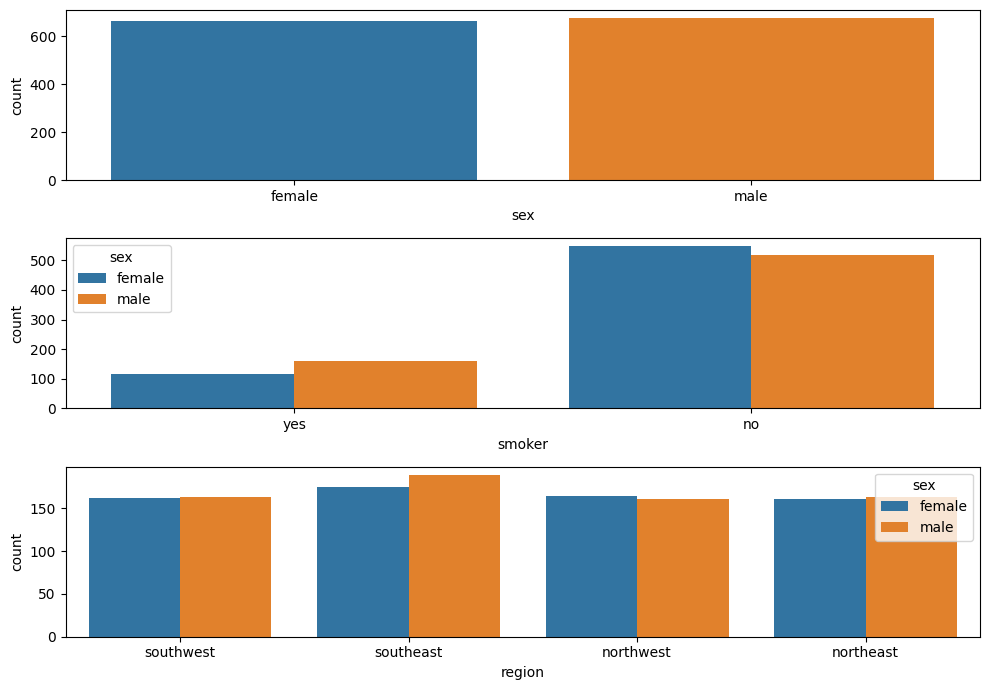

In [5]:
fig, axis = plt.subplots(figsize=(10, 7), nrows=3)
axis = axis.flatten()

variables = ['sex', 'smoker', 'region']
for i, variable in enumerate(variables):
    sns.countplot(ax=axis[i], data=raw_data, x=variable, hue='sex')

plt.tight_layout()

plt.show()

Based on the above plots please note:
- The data is pretty balanced between male and female. 
- The majority of the people in the data are non-smokers
- The regions are relatively balanced.

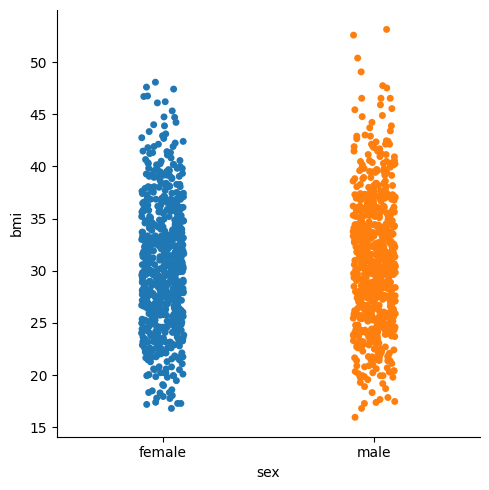

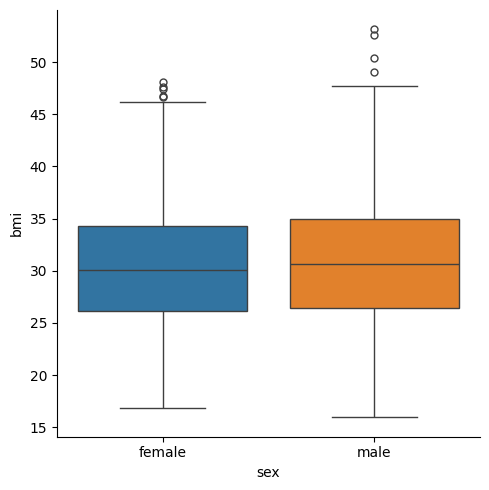

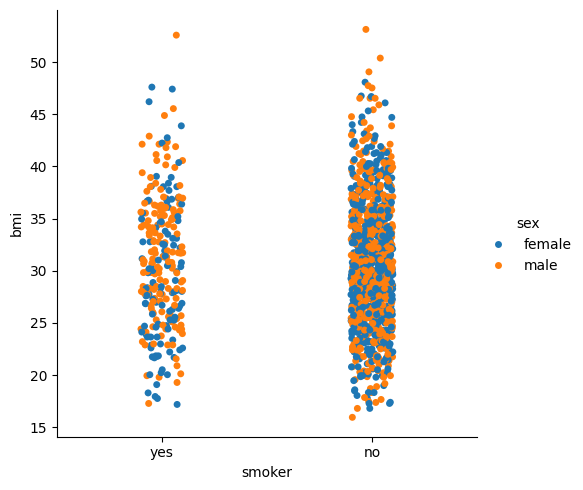

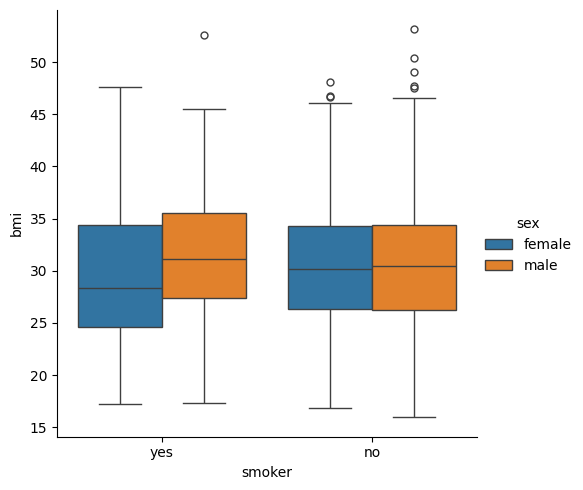

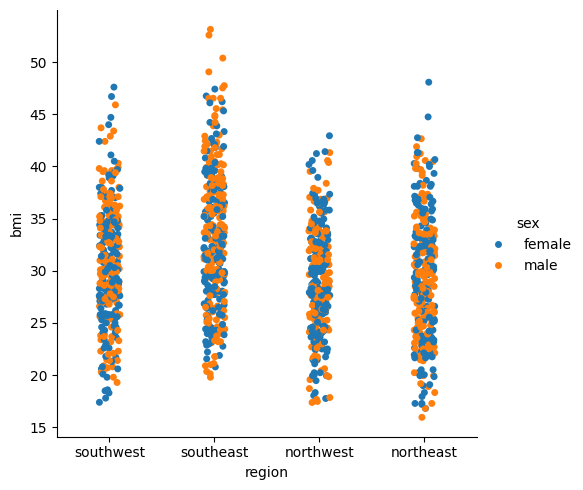

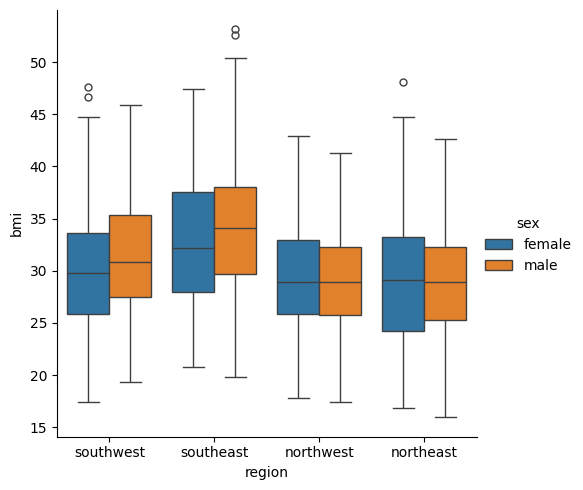

In [6]:
variables = ['sex', 'smoker', 'region']

for i, variable in enumerate(variables):
    sns.catplot(data=raw_data, x=variable, y='bmi', hue='sex')
    sns.catplot(data=raw_data, x=variable, y='bmi', hue='sex', kind='box')


Based on the above plots please note:
- The data has outliers
- The southeast region contains people with the highest bmi's

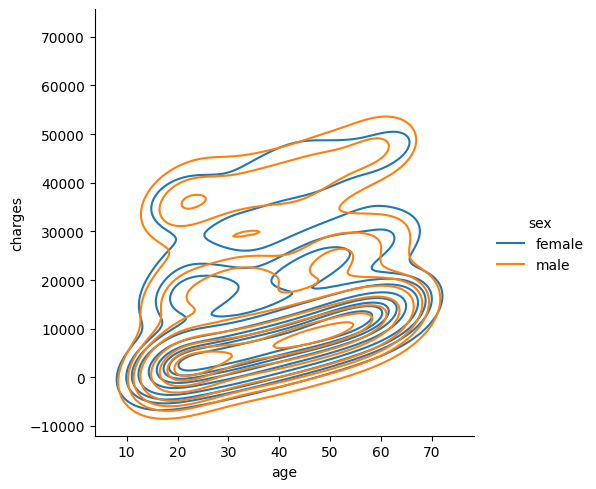

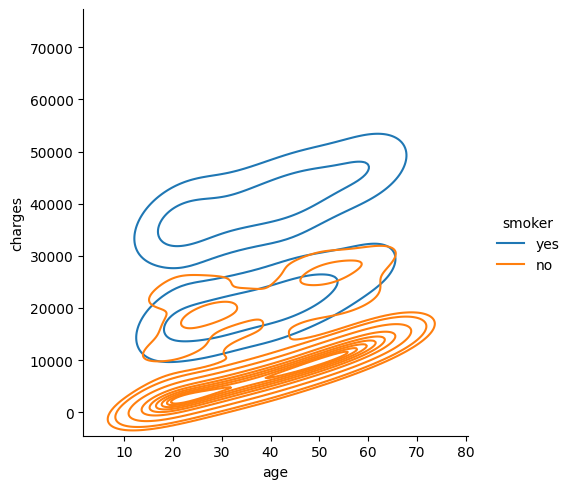

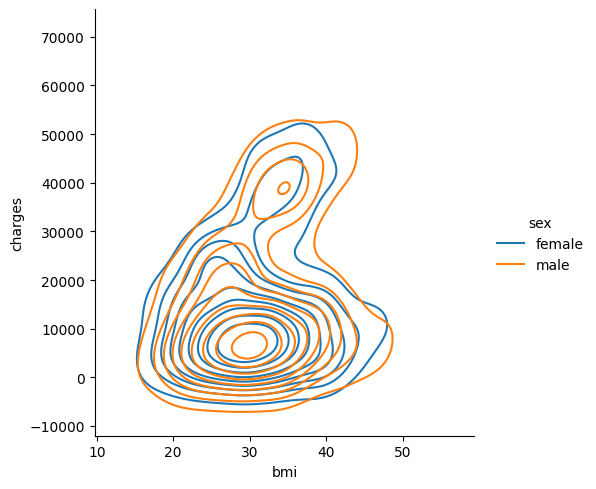

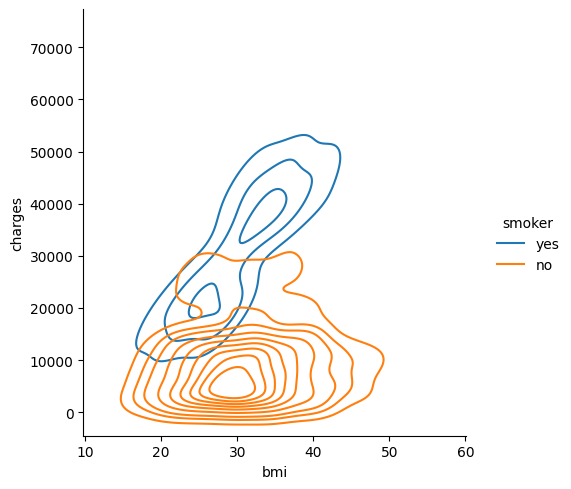

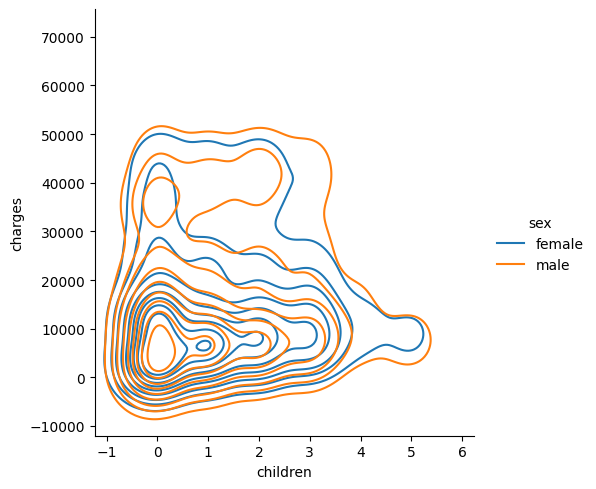

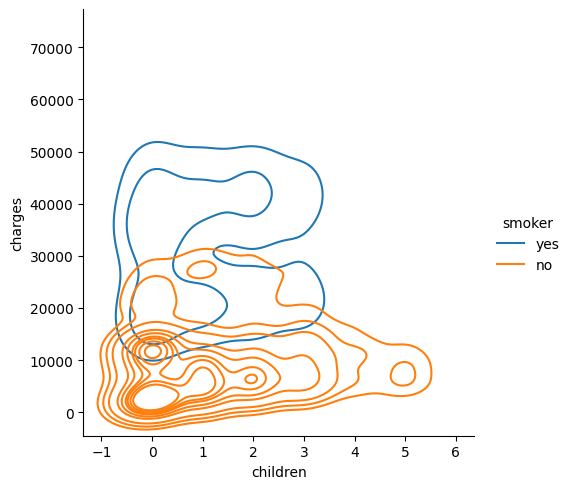

In [7]:
variables = ['age', 'bmi', 'children']

for variable in variables:
    sns.displot(data=raw_data, x=variable, y='charges', hue='sex', kind='kde')
    sns.displot(data=raw_data, x=variable, y='charges', hue='smoker', kind='kde')

Based on the above plots note:
- Men and women have similar medical charges 
- Smokers seem to have higher charges than non-smokers

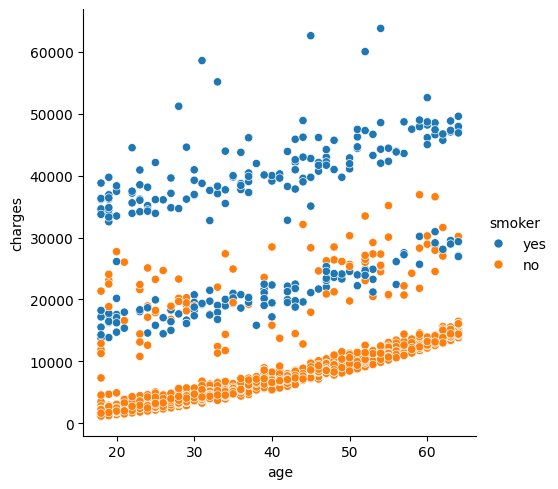

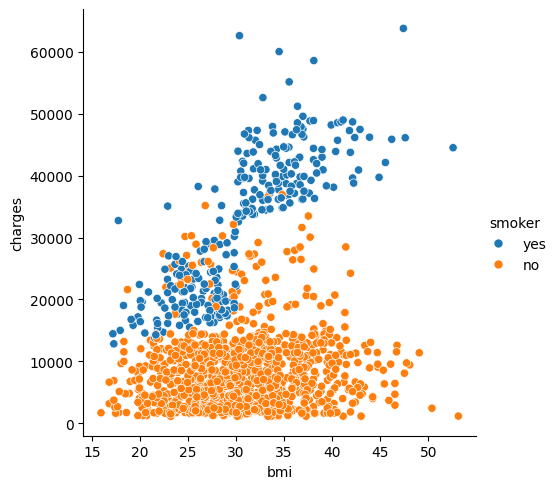

In [8]:
variables = ['age', 'bmi']

for variable in variables:
    sns.relplot(data=raw_data, x=variable, y='charges', hue='smoker')

Using a scatter plot it is resoundingly clear that smokers have higher medical charges than non-smokers.

In [9]:
raw_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

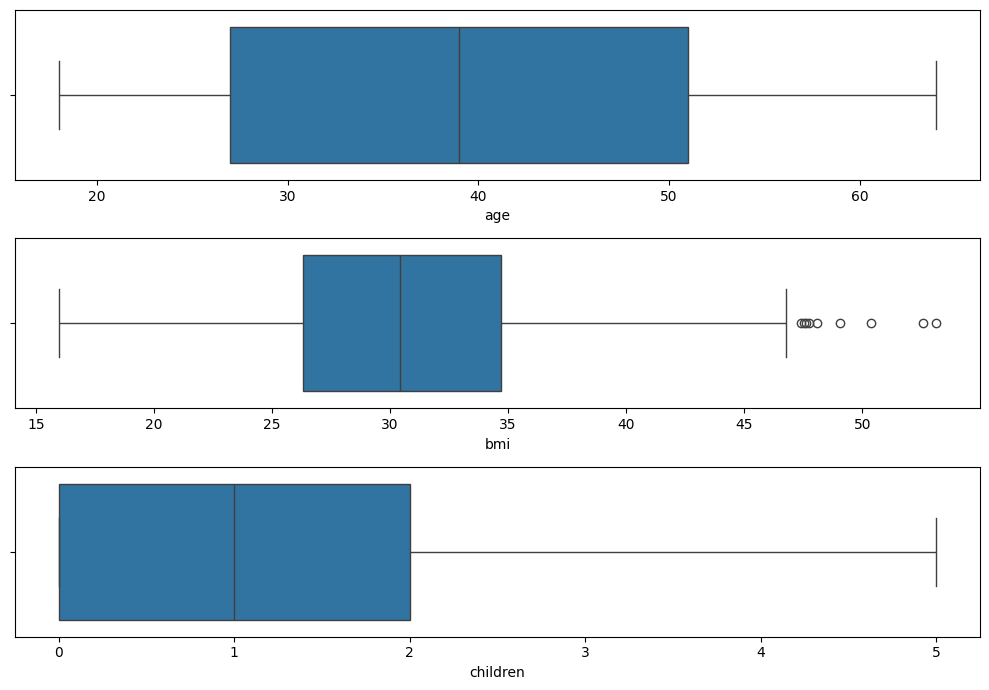

In [10]:
fig, axis = plt.subplots(figsize=(10, 7), nrows=3)
axis = axis.flatten()

variables = ['age', 'bmi', 'children']
for i, variable in enumerate(variables):
    sns.boxplot(ax=axis[i], data=raw_data, x=variable)

plt.tight_layout()

plt.show()

Based on the above plots note the following:
- bmi has some outliers

In [11]:
bmi_stats = raw_data['bmi'].describe()
bmi_stats

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [12]:
bmi_iqr = bmi_stats['75%'] - bmi_stats['25%']

upper_limit = bmi_stats['75%'] + 1.5 * bmi_iqr
lower_limit = bmi_stats['25%'] - 1.5 * bmi_iqr

print(f"Outlier upper limit: {round(upper_limit, 2)}, lower limit: {lower_limit}")

Outlier upper limit: 47.29, lower limit: 13.7


In [13]:
outliers = raw_data[raw_data['bmi'] > 47.29]

outliers

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [14]:
outliers.describe()

,age,bmi,children,charges
count,9.000000,9.000000,9.000000,9.000000
mean,39.666667,49.276667,0.888889,21848.215134
std,15.223337,2.242304,0.781736,23085.711786
min,18.000000,47.410000,0.000000,1163.462700
25%,23.000000,47.600000,0.000000,8083.919800
50%,46.000000,48.070000,1.000000,9748.910600
75%,52.000000,50.380000,1.000000,44501.398200
max,58.000000,53.130000,2.000000,63770.428010


In [15]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 116 to 1317
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9 non-null      int64  
 1   sex       9 non-null      object 
 2   bmi       9 non-null      float64
 3   children  9 non-null      int64  
 4   smoker    9 non-null      object 
 5   region    9 non-null      object 
 6   charges   9 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 576.0+ bytes


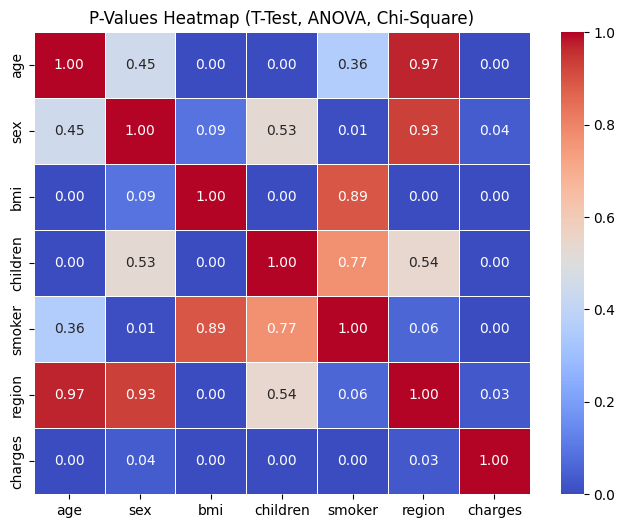

In [17]:
# Helper function to compute p-value
def compute_p_value(col1, col2, df):
    if np.issubdtype(df[col1].dtype, np.number) and np.issubdtype(df[col2].dtype, np.number):
        return stats.ttest_ind(df[col1], df[col2], equal_var=False).pvalue

    elif np.issubdtype(df[col1].dtype, np.number) and not np.issubdtype(df[col2].dtype, np.number):
        groups = [df[col1][df[col2] == category] for category in df[col2].unique()]
        return stats.f_oneway(*groups).pvalue if len(groups) > 2 else stats.ttest_ind(*groups, equal_var=False).pvalue

    elif np.issubdtype(df[col2].dtype, np.number) and not np.issubdtype(df[col1].dtype, np.number):
        groups = [df[col2][df[col1] == category] for category in df[col1].unique()]
        return stats.f_oneway(*groups).pvalue if len(groups) > 2 else stats.ttest_ind(*groups, equal_var=False).pvalue

    else:
        contingency_table = pd.crosstab(df[col1], df[col2])
        return stats.chi2_contingency(contingency_table)[1]

# Compute pairwise p-values using combinations (avoiding redundant calculations)
cols = raw_data.columns
p_values = pd.DataFrame(np.ones((len(cols), len(cols))), index=cols, columns=cols)

for col1, col2 in combinations(cols, 2):
    p_val = compute_p_value(col1, col2, raw_data)
    p_values.loc[col1, col2] = p_values.loc[col2, col1] = p_val

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(p_values, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("P-Values Heatmap (T-Test, ANOVA, Chi-Square)")
plt.show()

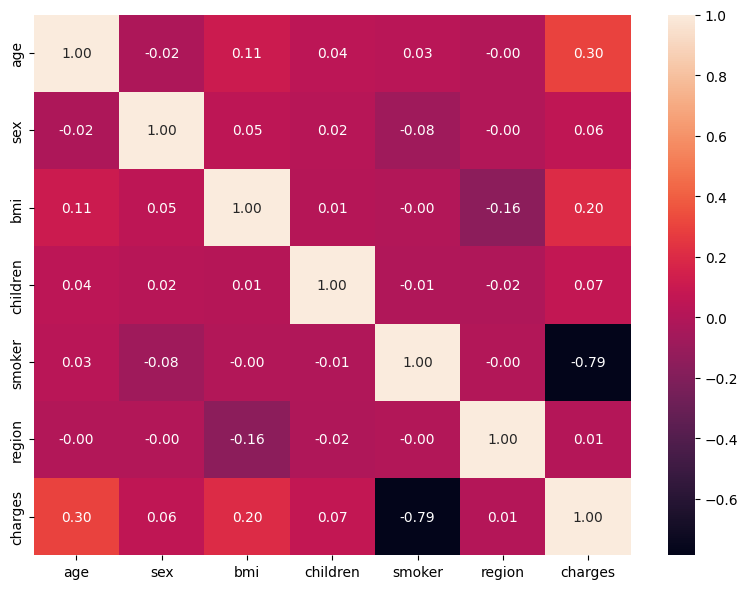

In [19]:
def make_heatmap(data):

    fig, axis = plt.subplots(figsize=(8, 6))
    
    to_factorize = ['sex', 'smoker', 'region']
    graph_data = data.copy()

    for variable in to_factorize:
        graph_data[variable] = pd.factorize(graph_data[variable])[0]

    sns.heatmap(graph_data.corr(), annot=True, fmt='.2f')

    plt.tight_layout()

    plt.show()

make_heatmap(raw_data)

In [20]:
model_data = raw_data[['age', 'bmi', 'smoker', 'charges']]
model_data.head()

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520


In [24]:
# One hot encode the variable 'smoker'

one_hot = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot.fit_transform(model_data[['smoker']])
one_hot_encoded

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], shape=(1338, 2))

In [25]:
# convert to dataframe and add the encoded data back to the model dataframe

one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot.get_feature_names_out(['smoker']))
model_data = pd.concat([model_data.drop(columns=['smoker']), one_hot_df], axis=1)
model_data.head()

,age,bmi,charges,smoker_no,smoker_yes
0,19,27.900,16884.92400,0.0,1.0
1,18,33.770,1725.55230,1.0,0.0
2,28,33.000,4449.46200,1.0,0.0
3,33,22.705,21984.47061,1.0,0.0
4,32,28.880,3866.85520,1.0,0.0


In [ ]:
X = model_data.drop('charges', axis = 1)
y = model_data['charges']

In [27]:
X.head()

,age,bmi,smoker_no,smoker_yes
0,19,27.900,0.0,1.0
1,18,33.770,1.0,0.0
2,28,33.000,1.0,0.0
3,33,22.705,1.0,0.0
4,32,28.880,1.0,0.0


In [28]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train

,age,bmi,smoker_no,smoker_yes
560,46,19.950,1.0,0.0
1285,47,24.320,1.0,0.0
1142,52,24.860,1.0,0.0
969,39,34.320,1.0,0.0
486,54,21.470,1.0,0.0
...,...,...,...,...
1095,18,31.350,1.0,0.0
1130,39,23.870,1.0,0.0
1294,58,25.175,1.0,0.0
860,37,47.600,0.0,1.0


In [32]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [33]:
X_test

,age,bmi,smoker_no,smoker_yes
764,45,25.175,1.0,0.0
887,36,30.020,1.0,0.0
890,64,26.885,0.0,1.0
1293,46,25.745,1.0,0.0
259,19,31.920,0.0,1.0
...,...,...,...,...
109,63,35.090,0.0,1.0
575,58,27.170,1.0,0.0
535,38,28.025,1.0,0.0
543,54,47.410,0.0,1.0


In [34]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [35]:
# scale the data 
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [36]:
X_train_scaled

array([[0.60869565, 0.10734463, 1.        , 0.        ],
       [0.63043478, 0.22491256, 1.        , 0.        ],
       [0.73913043, 0.23944041, 1.        , 0.        ],
       ...,
       [0.86956522, 0.24791499, 1.        , 0.        ],
       [0.41304348, 0.85122411, 0.        , 1.        ],
       [0.80434783, 0.37503363, 1.        , 0.        ]], shape=(1070, 4))

In [37]:
X_test_scaled

array([[0.58695652, 0.23374808, 1.        , 0.        ],
       [0.39130435, 0.36921571, 1.        , 0.        ],
       [1.        , 0.28156018, 0.        , 1.        ],
       ...,
       [0.43478261, 0.31343492, 1.        , 0.        ],
       [0.7826087 , 0.85544527, 0.        , 1.        ],
       [0.7173913 , 0.48608975, 1.        , 0.        ]], shape=(268, 4))

In [38]:
# create a dataframe with the scaled data
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [40]:
X_train_df

,age,bmi,smoker_no,smoker_yes
0,0.608696,0.107345,1.0,0.0
1,0.630435,0.224913,1.0,0.0
2,0.739130,0.239440,1.0,0.0
3,0.456522,0.493947,1.0,0.0
4,0.782609,0.148238,1.0,0.0
...,...,...,...,...
1065,0.000000,0.414044,1.0,0.0
1066,0.456522,0.212806,1.0,0.0
1067,0.869565,0.247915,1.0,0.0
1068,0.413043,0.851224,0.0,1.0


In [41]:
X_test_df

,age,bmi,smoker_no,smoker_yes
0,0.586957,0.233748,1.0,0.0
1,0.391304,0.369216,1.0,0.0
2,1.000000,0.281560,0.0,1.0
3,0.608696,0.249685,1.0,0.0
4,0.021739,0.422340,0.0,1.0
...,...,...,...,...
263,0.978261,0.510974,0.0,1.0
264,0.869565,0.289529,1.0,0.0
265,0.434783,0.313435,1.0,0.0
266,0.782609,0.855445,0.0,1.0


In [42]:
# create and train the linear regression model
model = LinearRegression()
model.fit(X_train_df, y_train)

LinearRegression()

In [44]:
r2 = model.score(X_test_df, y_test)
r2

0.7778083745741506

In [43]:
# extract the predictions
y_pred = model.predict(X_test_df)
y_pred

array([ 8012.13801492,  7321.23148299, 37196.46327048,  8464.93472656,
       27231.25154112, 11172.26758327,   365.00232862, 17259.89722622,
         926.98452254, 10242.32896004, 27533.4189976 ,  8811.66901313,
        5359.47198393, 37773.96086985, 40920.54109416, 36876.44477809,
       14988.7802464 , 36092.72051279,  9246.96261899, 31748.84897339,
        2391.35884097, 10012.43131555,  3040.18234241,  7009.29032213,
       10308.35265764, 12893.0855323 , 15270.59122845,  5115.4639794 ,
        9014.42469172,  2692.56074862,  8114.5946084 , 13381.23638564,
        5075.56009619,  2348.27529788,  4720.34394529, 12975.72502846,
        2201.90445678,  9096.38996651, 33148.8393644 , 32754.04562152,
        2429.48810972,  4140.72380132, 14470.44261156, 11740.57413315,
        8487.04417654, 12432.69426354,  4654.85962478,  2527.06867045,
       34831.15847565,  8863.90864192, 16455.95133078,  2431.31932686,
       12226.6024419 ,  1330.37333513, 14005.63644556, 11662.05820679,
      

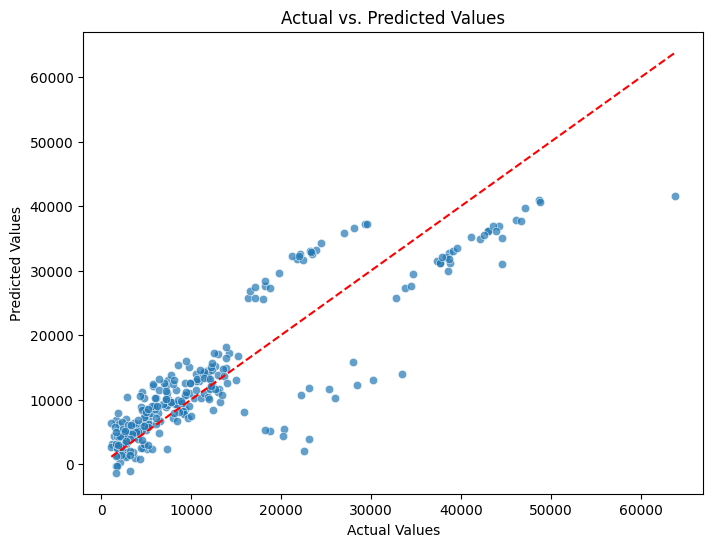

In [ ]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)  # Scatter plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [48]:
# fine tune the model
hyperparams = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]
}

grid = GridSearchCV(ElasticNet(), hyperparams, scoring='r2', cv=5)
grid.fit(X_train_df, y_train)

grid.best_params_

/workspaces/Dansah2_LinearRegression_machine-learning-python-template/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.377e+09, tolerance: 1.242e+07
  model = cd_fast.enet_coordinate_descent(
/workspaces/Dansah2_LinearRegression_machine-learning-python-template/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.800e+09, tolerance: 1.266e+07
  model = cd_fast.enet_coordinate_descent(
/workspaces/Dansah2_LinearRegression_machine-learning-python-template/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning

{'alpha': 0.01, 'l1_ratio': 0.9}

In [50]:
model_grid = ElasticNet(alpha = 0.01, l1_ratio = 0.9)
model_grid.fit(X_train_df, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.9)

In [52]:
r2 = model_grid.score(X_test_df, y_test)
r2

0.7778179884156364

In [51]:
y_pred = model_grid.predict(X_test_df)
y_pred

array([ 8082.00496138,  7354.67984365, 37125.69269235,  8525.80002519,
       27204.30755864, 11058.66495427,   525.75519217, 17136.36459415,
        1128.62962583, 10261.64993983, 27569.80343638,  8826.95105836,
        5414.02080553, 37562.36535282, 40693.70430671, 36702.703252  ,
       14843.40012408, 35946.17409363,  9280.69167456, 31726.19290018,
        2522.05941173,  9999.46775213,  3108.10688643,  6959.61843011,
       10332.09295147, 12853.97731109, 15189.24589381,  5165.05918821,
        9062.93310205,  2765.83738067,  8147.35469843, 13345.32038512,
        5086.27800859,  2514.0224897 ,  4776.93943043, 12873.35629773,
        2312.33776124,  9115.21289169, 33137.99678024, 32649.53710445,
        2518.60364614,  4190.59070975, 14390.02100303, 11775.00950254,
        8459.90804541, 12443.11317487,  4680.1757764 ,  2653.06013179,
       34701.54675463,  8810.27472238, 16353.60516717,  2513.66099454,
       12116.67651637,  1450.91765302, 13941.34353681, 11638.82513411,
      